In [1]:
import sys
import os
from dotenv import load_dotenv


import sqlalchemy as sq
import pandas as pd
from matplotlib import pyplot as plt

sys.path.append("../")
from Shared.DataService import DataService

In [2]:
load_dotenv()
PG_DB = os.getenv("POSTGRES_DB")
PG_ADDR = os.getenv("POSTGRES_ADDR")
PG_PORT = os.getenv("POSTGRES_PORT")
PG_USER = os.getenv("POSTGRES_USER")
PG_PW = os.getenv("POSTGRES_PW")

In [3]:
# connecting to database
db = DataService(PG_DB, PG_ADDR, PG_PORT, PG_USER, PG_PW)
conn = db.connect()

In [4]:
query = sq.text("select * FROM public.ergot_sample")
ergot_df = pd.read_sql(query, conn)

In [5]:
ergot_df

,sample_id,year,province,crop_district,incidence,severity
0,1,1995,AB,1,False,0.0
1,2,1995,AB,1,False,0.0
2,3,1995,AB,1,False,0.0
3,4,1995,AB,1,False,0.0
4,5,1995,AB,1,False,0.0
...,...,...,...,...,...,...
158684,158685,2022,SK,81,False,0.0
158685,158686,2022,SK,81,False,0.0
158686,158687,2022,SK,81,False,0.0
158687,158688,2022,AB,7,False,0.0


In [6]:
# car : canadian agriculture region
ergot_df.loc[ergot_df["province"] == "MB", "car_uid"] = ergot_df.loc[ergot_df["province"] == "MB", "crop_district"] + 4600
ergot_df.loc[ergot_df["province"] == "SK", "car_uid"] = (ergot_df.loc[ergot_df["province"] == "SK", "crop_district"] - 1) + 4700
ergot_df.loc[ergot_df["province"] == "AB", "car_uid"] = (ergot_df.loc[ergot_df["province"] == "AB", "crop_district"] * 10) + 4800

In [7]:
ergot_df.drop(columns=['crop_district', 'sample_id'], inplace=True)

In [8]:
ergot_df['car_uid'] = pd.to_numeric(ergot_df['car_uid'], downcast='integer')
ergot_df

,year,province,incidence,severity,car_uid
0,1995,AB,False,0.0,4810
1,1995,AB,False,0.0,4810
2,1995,AB,False,0.0,4810
3,1995,AB,False,0.0,4810
4,1995,AB,False,0.0,4810
...,...,...,...,...,...
158684,2022,SK,False,0.0,4780
158685,2022,SK,False,0.0,4780
158686,2022,SK,False,0.0,4780
158687,2022,AB,False,0.0,4870


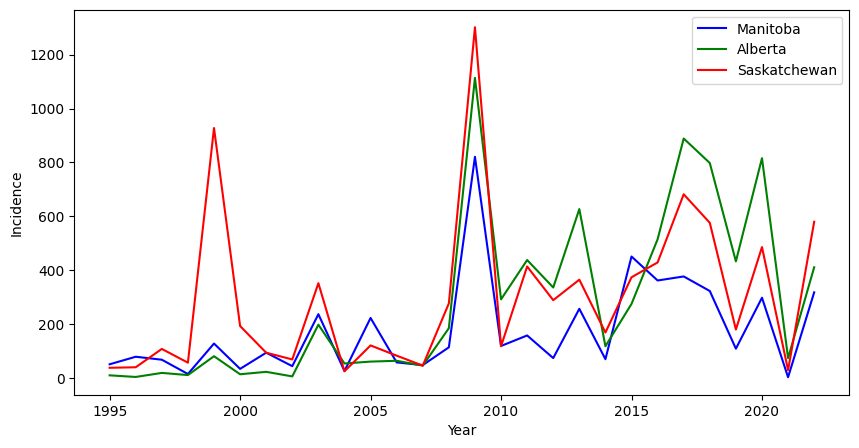

In [76]:
# sample with incidence = True: per year, per province
samples_df = ergot_df[ergot_df['incidence'] == True].groupby(['province', 'year'])['incidence'].count().reset_index()
mb_df = samples_df[samples_df['province'] == 'MB']
ab_df = samples_df[samples_df['province'] == 'AB']
sk_df = samples_df[samples_df['province'] == 'SK']

year = mb_df['year'].tolist()
mb_incidence = mb_df['incidence'].tolist()
ab_incidence = ab_df['incidence'].tolist()
sk_incidence = sk_df['incidence'].tolist()


plt.figure(figsize=(10,5))
plt.xlabel('Year')
plt.ylabel('Incidence')
plt.plot(year, mb_incidence, color="blue")
plt.plot(year, ab_incidence, color="green")
plt.plot(year, sk_incidence, color="red")
plt.legend(['Manitoba', 'Alberta', 'Saskatchewan'])
plt.show()


In [83]:
ratio_df = ergot_df.groupby(['province', 'year'])['incidence'].count().reset_index()
ratio_df['ratio'] = (samples_df['incidence']/ratio_df['incidence']).to_frame()
ratio_df.drop(columns = {'incidence'}, inplace=True)
ratio_df

,province,year,ratio
0,AB,1995,0.003510
1,AB,1996,0.001050
2,AB,1997,0.005782
3,AB,1998,0.006448
4,AB,1999,0.038682
...,...,...,...
79,SK,2018,0.225088
80,SK,2019,0.063852
81,SK,2020,0.232982
82,SK,2021,0.018035


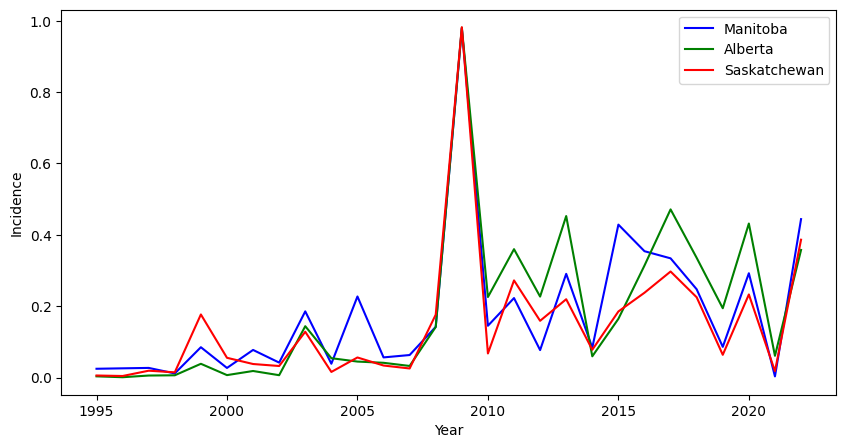

Highest ratio in MB: 0.9785458879618594, in year: 2009
Highest ratio in AB: 0.9806338028169014, in year: 2009
Highest ratio in SK: 0.9819004524886877, in year: 2009
Lowest ratio in MB: 0.0033482142857142855, in year: 2021
Lowest ratio in AB: 0.0010495932826029913, in year: 1996
Lowest ratio in SK: 0.0044662795891022775, in year: 1996


In [90]:
# Min, max for each province
mb_ratio = ratio_df[ratio_df['province'] == 'MB']['ratio'].tolist()
ab_ratio = ratio_df[ratio_df['province'] == 'AB']['ratio'].tolist()
sk_ratio = ratio_df[ratio_df['province'] == 'SK']['ratio'].tolist()


plt.figure(figsize=(10,5))
plt.xlabel('Year')
plt.ylabel('Incidence')
plt.plot(year, mb_ratio, color="blue")
plt.plot(year, ab_ratio, color="green")
plt.plot(year, sk_ratio, color="red")
plt.legend(['Manitoba', 'Alberta', 'Saskatchewan'])
plt.show()

print('Highest ratio in MB: {}, in year: {}'.format(max(mb_ratio), mb_ratio.index(max(mb_ratio)) + 1995))
print('Highest ratio in AB: {}, in year: {}'.format(max(ab_ratio), ab_ratio.index(max(ab_ratio)) + 1995))
print('Highest ratio in SK: {}, in year: {}'.format(max(sk_ratio), sk_ratio.index(max(sk_ratio)) + 1995))

print('Lowest ratio in MB: {}, in year: {}'.format(min(mb_ratio), mb_ratio.index(min(mb_ratio)) + 1995))
print('Lowest ratio in AB: {}, in year: {}'.format(min(ab_ratio), ab_ratio.index(min(ab_ratio)) + 1995))
print('Lowest ratio in SK: {}, in year: {}'.format(min(sk_ratio), sk_ratio.index(min(sk_ratio)) + 1995))